# Data Wragling Project (WeRateDogs)

### By: Mohamed Refaiy

##### Nov 2020


## TOC:
* [Introduction](#introduction-bullet)
* [Gathering](#first-bullet)
* [Assessing](#second-bullet)
  * [Quality Issues](#3rd-bullet)
  * [Tidiness Issues](#4th-bullet)
* [Cleaning](#5th-bullet)
* [Storing Clean Data](#6th-bullet)
* [Analyzing and Visualizing Data](#7th-bullet)




# Introduction <a class="anchor" id="introduction-bullet"></a>
This work is dedicated for **Wrangle and Analyza Data Project**. The second project in **Data Analysis Professional Nanodegree Program**. In this report I will illustrate the steps I took to wrangle and analyze data from twitter account WeRateDogs*(@dog_rates)*.

The **wrangle** part include 3 main steps: 
1. *Gathering data* 
2. *Assessing data*
3. *Cleaning data*


In [1]:
#importing needed packages 
# please update all packages
import numpy as np
import pandas as pd
import tweepy
import requests
import json
import re
import matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set_style('whitegrid')
from scipy import stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 


# Gathering <a class="anchor" id="first-bullet"></a>

The files needed for this task came from diffrent extension and sources:

*   **Direct Upload:** twitter-archive-enhanced.csv
*   **Programmatic Download:** image_predictions.tsv
*   **Twitter API:** tweet_json.txt - which is a JSON file






### Twitter Archive (Direct Upload)

In [9]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [10]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Programmatic Download

In [11]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)
response = requests.get(url)
file_name = url.split('/')[-1]
if not os.path.isfile(file_name):
    with open(file_name, 'wb') as file:
        file.write(response.content)

In [12]:
Image_predictions_df = pd.read_csv('image-predictions.tsv', sep = '\t')

In [13]:
Image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Twitter API (JSON File)

In [15]:
# Twitter authentication & get-tweets
# Refrence: https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
consumer_key = '*******'
consumer_secret = '**************'
access_token = '***********'
access_secret = '*********************'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,
                 parser = tweepy.parsers.JSONParser(),
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

In [16]:
# Refrence: https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api
# Download Tweepy status object based on Tweet ID and store in list
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in archive_df['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

Rate limit reached. Sleeping for: 485
Rate limit reached. Sleeping for: 486


In [17]:
print("Found tweets count" ,len(list_of_tweets))
print("Not found tweets count" , len(cant_find_tweets_for_those_ids))

Found tweets count 2331
Not found tweets count 25


In [18]:
cant_find_tweets_for_those_ids

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 856602993587888130,
 851953902622658560,
 845459076796616705,
 844704788403113984,
 842892208864923648,
 837366284874571778,
 837012587749474308,
 829374341691346946,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 779123168116150273,
 775096608509886464,
 771004394259247104,
 770743923962707968,
 759566828574212096,
 754011816964026368,
 680055455951884288]

In [19]:
not_found_tweets_id = [[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 856602993587888130,
 851953902622658560,
 845459076796616705,
 844704788403113984,
 842892208864923648,
 837366284874571778,
 837012587749474308,
 829374341691346946,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 779123168116150273,
 775096608509886464,
 771004394259247104,
 770743923962707968,
 759566828574212096,
 754011816964026368,
 680055455951884288]]

In [23]:
# Isolate the json part of each tweepy status object that downloaded and adding to a list
my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)

In [24]:
my_list_of_dicts

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'},
      'large': {'w': 540, 'h': 528, 

In [26]:
# Save JSON file 
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [27]:
# Creating DataFrame
df_list = []
with open('tweet_json.txt') as json_file:  
    all_data = json.load(json_file)
    for line in all_data:
        tweet_id = line['id']
        whole_tweet = line['text']
        favorite_count = line['favorite_count']
        retweet_count = line['retweet_count']
        followers_count = line['user']['followers_count']
        
        
        df_list.append({'tweet_id': int(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count)})
                             
        
        twitter_api_df = pd.DataFrame(df_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count'])


In [28]:
twitter_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2331 non-null   int64
 1   favorite_count   2331 non-null   int64
 2   retweet_count    2331 non-null   int64
 3   followers_count  2331 non-null   int64
dtypes: int64(4)
memory usage: 73.0 KB


In [29]:
# saving DF to csv for future use
twitter_api_df.to_csv('twitter_api.csv', index=False)

In [30]:
#### Loadind twitter_api_df from CSV in future uses 
twitter_api_df= pd.read_csv('twitter_api.csv')

In [31]:
# test
sum(Image_predictions_df['tweet_id'].isin(twitter_api_df['tweet_id']))

2059

In [33]:
# test
sum(Image_predictions_df['tweet_id'].isin( archive_df['tweet_id']))

2075

# Assessing <a class="anchor" id="second-bullet"></a>


After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues


In [55]:
archive_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [56]:
archive_df.sample(10)


tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1713  680473011644985345                    NaN                  NaN   
490   813812741911748608                    NaN                  NaN   
701   786051337297522688           7.727430e+17         7.305050e+17   
2156  669597912108789760                    NaN                  NaN   
2027  671874878652489728                    NaN                  NaN   
1547  689280876073582592                    NaN                  NaN   
88    875097192612077568                    NaN                  NaN   
776   776113305656188928                    NaN                  NaN   
263   842535590457499648                    NaN                  NaN   
2075  670840546554966016                    NaN                  NaN   

                      timestamp  \
1713  2015-12-25 19:39:43 +0000   
490   2016-12-27 18:24:12 +0000   
701   2016-10-12 03:50:17 +0000   
2156  2015-11-25 19:25:57 +0000   
2027  2015-12-02 02:13:48 +0000   
1547  2016-01-19 02:59:01 +0000   
88    2017-06-14 21:06:43 +0000   
776   2016-09-14 17:40:06 +0000   
263   2017-03-17 00:38:32 +0000   
2075  2015-11-29 05:43:44 +0000   

                                                 source  \
1713  <a href="http://twitter.com/download/iphone" r...   
490   <a href="http://twitter.com/download/iphone" r...   
701   <a href="http://twitter.com/download/iphone" r...   
2156  <a href="http://twitter.com/download/iphone" r...   
2027  <a href="http://twitter.com/download/iphone" r...   
1547  <a href="http://twitter.com/download/iphone" r...   
88    <a href="http://twitter.com/download/iphone" r...   
776   <a href="http://twitter.com/download/iphone" r...   
263   <a href="http://twitter.com/download/iphone" r...   
2075  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1713  This is Hector. He thinks he's a hammer. Silly...                  NaN   
490   Meet Gary, Carrie Fisher's dog. Idk what I can...                  NaN   
701             13/10 for breakdancing puppo @shibbnbot                  NaN   
2156  This is Skye. He is a Bretwaldian Altostratus....                  NaN   
2027  This is Mia. She was specifically told not get...                  NaN   
1547  This is Herald. He wants you to know he could ...                  NaN   
88    You'll get your package when that precious man...                  NaN   
776   This is Sampson. He's about to get hit with a ...                  NaN   
263   This is Winnie. She lost her body saving a chi...                  NaN   
2075  Meet Colby. He's that one cool friend that get...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1713                       NaN                        NaN   
490                        NaN                        NaN   
701                        NaN                        NaN   
2156                       NaN                        NaN   
2027                       NaN                        NaN   
1547                       NaN                        NaN   
88                         NaN                        NaN   
776                        NaN                        NaN   
263                        NaN                        NaN   
2075                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1713  https://twitter.com/dog_rates/status/680473011...                10   
490   https://twitter.com/dog_rates/status/813812741...                14   
701                                                 NaN                13   
2156  https://twitter.com/dog_rates/status/669597912...                10   
2027  https://twitter.com/dog_rates/status/671874878...                10   
1547  https://twitter.com/dog_rates/status/689280876...                10   
88    https://twitter.com/drboondoc/status/874413398...                13   
776   https://twit

In [57]:
archive_df.rating_numerator.value_counts(),  archive_df.rating_denominator.value_counts()




(12      558
 11      464
 10      461
 13      351
 9       158
 8       102
 7        55
 14       54
 5        37
 6        32
 3        19
 4        17
 1         9
 2         9
 420       2
 0         2
 15        2
 75        2
 80        1
 20        1
 24        1
 26        1
 44        1
 50        1
 60        1
 165       1
 84        1
 88        1
 144       1
 182       1
 143       1
 666       1
 960       1
 1776      1
 17        1
 27        1
 45        1
 99        1
 121       1
 204       1
 Name: rating_numerator, dtype: int64,
 10     2333
 11        3
 50        3
 80        2
 20        2
 2         1
 16        1
 40        1
 70        1
 15        1
 90        1
 110       1
 120       1
 130       1
 150       1
 170       1
 7         1
 0         1
 Name: rating_denominator, dtype: int64)

In [58]:
archive_df['doggo'].value_counts(), archive_df['floofer'].value_counts(), archive_df['pupper'].value_counts(), archive_df['puppo'].value_counts()


(None     2259
 doggo      97
 Name: doggo, dtype: int64,
 None       2346
 floofer      10
 Name: floofer, dtype: int64,
 None      2099
 pupper     257
 Name: pupper, dtype: int64,
 None     2326
 puppo      30
 Name: puppo, dtype: int64)

In [59]:
archive_df[['rating_numerator','rating_denominator']].describe()

rating_numerator  rating_denominator
count       2356.000000         2356.000000
mean          13.126486           10.455433
std           45.876648            6.745237
min            0.000000            0.000000
25%           10.000000           10.000000
50%           11.000000           10.000000
75%           12.000000           10.000000
max         1776.000000          170.000000

In [60]:
twitter_api_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2331 non-null   int64
 1   favorite_count   2331 non-null   int64
 2   retweet_count    2331 non-null   int64
 3   followers_count  2331 non-null   int64
dtypes: int64(4)
memory usage: 73.0 KB


In [61]:
twitter_api_df.sample(10)


tweet_id  favorite_count  retweet_count  followers_count
1053  739544079319588864           38374          20469          8912767
281   837820167694528512           33295           7605          8912754
1935  673363615379013632             971            282          8912779
1254  708853462201716736            1753            639          8912767
1286  707038192327901184            2124            759          8912768
2162  668979806671884288             746            323          8912781
1823  675798442703122432            9750           3239          8912778
693   784517518371221505            8905           2495          8912756
358   828376505180889089            7274           1044          8912754
2191  668537837512433665             235             65          8912782

In [62]:
twitter_api_df.followers_count.value_counts()

8912756    288
8912772    185
8912755    171
8912754    161
8912781    158
8912778    152
8912768    151
8912767    147
8912773    125
8912751    101
8912771     94
8912782     89
8912780     87
8912766     87
8912752     57
8912770     51
8912750     47
8912769     41
8912784     32
8912757     30
8912783     27
8912753     16
8912765      7
8912779      7
8913395      4
8913382      3
8913406      2
8913400      2
8913384      2
8913379      1
8913397      1
8913411      1
8913408      1
8913398      1
8913396      1
8913394      1
Name: followers_count, dtype: int64

In [63]:
Image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [64]:
Image_predictions_df.sample(5)

tweet_id                                          jpg_url  \
1793  831262627380748289  https://pbs.twimg.com/media/C4k88lGVMAEKNzb.jpg   
1837  837366284874571778  https://pbs.twimg.com/media/C57sMJwXMAASBSx.jpg   
1559  793256262322548741  https://pbs.twimg.com/media/CwI2XCvXEAEO8mc.jpg   
989   707969809498152960  https://pbs.twimg.com/media/CdM2xRpXEAUsR4k.jpg   
114   667924896115245057  https://pbs.twimg.com/media/CUTyJpHWcAATl0O.jpg   

      img_num                              p1   p1_conf  p1_dog  \
1793        1                  cocker_spaniel  0.263323    True   
1837        1  American_Staffordshire_terrier  0.660085    True   
1559        1                          basset  0.207622    True   
989         1                      toy_poodle  0.908491    True   
114         1              Labrador_retriever  0.209051    True   

                             p2   p2_conf  p2_dog            p3   p3_conf  \
1793           Brittany_spaniel  0.200550    True       doormat  0.193414   
1837  Staffordshire_bullterrier  0.334947    True     dalmatian  0.002697   
1559               Walker_hound  0.060574    True        beagle  0.041221   
989            miniature_poodle  0.082652    True         teddy  0.005786   
114                         hog  0.203980   False  Newfoundland  0.165914   

      p3_dog  
1793   False  
1837    True  
1559    True  
989    False  
114     True

In [65]:
Image_predictions_df.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [66]:
sum(Image_predictions_df.jpg_url.duplicated())

66

In [67]:
all_columns= pd.Series(list(Image_predictions_df) + list(twitter_api_df) + list(archive_df) )

all_columns[all_columns.duplicated()]

12    tweet_id
16    tweet_id
dtype: object

In [68]:
archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [69]:
archive_df[archive_df.rating_numerator <= 3]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
315   835152434251116546                    NaN                  NaN   
605   798576900688019456                    NaN                  NaN   
765   777885040357281792                    NaN                  NaN   
1016  746906459439529985           7.468859e+17         4.196984e+09   
1189  718246886998687744                    NaN                  NaN   
1249  711306686208872448                    NaN                  NaN   
1314  706901761596989440                    NaN                  NaN   
1406  699088579889332224                    NaN                  NaN   
1446  696490539101908992           6.964887e+17         4.196984e+09   
1478  693590843962331137                    NaN                  NaN   
1601  686003207160610816                    NaN                  NaN   
1692  681302363064414209                    NaN                  NaN   
1761  678675843183484930                    NaN                  NaN   
1764  678424312106393600                    NaN                  NaN   
1836  676098748976615425                    NaN                  NaN   
1869  675153376133427200                    NaN                  NaN   
1898  674690135443775488                    NaN                  NaN   
1920  674265582246694913                    NaN                  NaN   
1928  674045139690631169                    NaN                  NaN   
1938  673906403526995968                    NaN                  NaN   
1940  673716320723169284           6.737159e+17         4.196984e+09   
1947  673700254269775872                    NaN                  NaN   
2038  671550332464455680           6.715449e+17         4.196984e+09   
2079  670826280409919488                    NaN                  NaN   
2091  670783437142401025                    NaN                  NaN   
2136  670055038660800512                    NaN                  NaN   
2183  668989615043424256                    NaN                  NaN   
2202  668643542311546881                    NaN                  NaN   
2237  668142349051129856                    NaN                  NaN   
2239  667937095915278337                    NaN                  NaN   
2246  667878741721415682                    NaN                  NaN   
2261  667549055577362432                    NaN                  NaN   
2305  666837028449972224                    NaN                  NaN   
2310  666786068205871104                    NaN                  NaN   
2326  666411507551481857                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2349  666051853826850816                    NaN                  NaN   

                      timestamp  \
315   2017-02-24 15:40:31 +0000   
605   2016-11-15 17:22:24 +0000   
765   2016-09-19 15:00:20 +0000   
1016  2016-06-26 03:22:31 +0000   
1189  2016-04-08 01:19:36 +0000   
1249  2016-03-19 21:41:44 +0000   
1314  2016-03-07 17:58:08 +0000   
1406  2016-02-15 04:31:20 +0000   
1446  2016-02-08 00:27:39 +0000   
1478  2016-01-31 00:25:18 +0000   
1601  2016-01-10 01:54:44 +0000   
1692  2015-12-28 02:35:15 +0000   
1761  2015-12-20 20:38:24 +0000   
1764  2015-12-20 03:58:55 +0000   
1836  2015-12-13 17:57:57 +0000   
1869  2015-12-11 03:21:23 +0000   
1898  2015-12-09 20:40:38 +0000   
1920  2015-12-08 16:33:36 +0000   
1928  2015-12-08 01:57:39 +0000   
1938  2015-12-07 16:46:21 +0000   
1940  2015-12-07 04:11:02 +0000   
1947  2015-12-07 03:07:12 +0000   
2038  2015-12-01 04:44:10 +0000   
2079  2015-11-29 04:47:03 +0000   
2091  2015-11-29 01:56:48 +0000   
2136  2015-11-27 01:42:24 +0000   
2183  2015-11-24 03:08:48 +0000   
2202  2015-11-23 04:13:37 +0000   
2237  2015-11-21 19:02:04 +0000   
2239  2015-11-21 05:26:27 +0000   
2246  2015-11-21 01:34:35 +0000   
2261  2015-11-2

In [70]:
archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [71]:
archive_df[archive_df.rating_denominator != 10]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
433   820690176645140481                    NaN                  NaN   
516   810984652412424192                    NaN                  NaN   
784   775096608509886464                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
1068  740373189193256964                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1165  722974582966214656                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1662  682962037429899265                    NaN                  NaN   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1779  677716515794329600                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   

                      timestamp  \
313   2017-02-24 21:54:03 +0000   
342   2017-02-16 04:45:50 +0000   
433   2017-01-15 17:52:40 +0000   
516   2016-12-19 23:06:23 +0000   
784   2016-09-11 22:20:06 +0000   
902   2016-07-28 01:00:57 +0000   
1068  2016-06-08 02:41:38 +0000   
1120  2016-05-13 16:15:54 +0000   
1165  2016-04-21 02:25:47 +0000   
1202  2016-04-03 01:36:11 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1598  2016-01-10 04:04:10 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1662  2016-01-01 16:30:13 +0000   
1663  2016-01-01 06:22:03 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   
2335  2015-11-16 16:11:11 +0000   

                                                 source  \
313   <a href="http://twitter.com/download/iphone" r...   
342   <a href="http://twitter.com/download/iphone" r...   
433   <a href="http://twitter.com/download/iphone" r...   
516   <a href="http://twitter.com/download/iphone" r...   
784   <a href="http://twitter.com/download/iphone" r...   
902   <a href="http://twitter.com/download/iphone" r...   
1068  <a href="http://twitter.com/download/iphone" r...   
1120  <a href="http://twitter.com/download/iphone" r...   
1165  <a href="http://twitter.com/download/iphone" r...   
1202  <a href="http://twitter.com/download/iphone" r...   
1228  <a href="http://twitter.com/download/iphone" r...   
1254  <a href="http://twitter.com/download/iphone" r...   
1274  <a href="http://twitter.com/download/iphone" r...   
1351  <a href="http://twitter.com/download/iphone" r...   
1433  <a href="http://twitter.com/download/iphone" r...   
1598  <a href="http://twitter.com/download/iphone" r...   
1634  <a href="http://twitter.com/download/iphone" r...   
1635  <a href="http://twitter.com/download/iphone" r...   
1662  <a href="http://twitter.com/download/iphone" r...   
1663  <a href="http://twitter.com/download/iphone" r...   
1779  <a href="http://twitter.com/download/iphone" r...   
1843  <a href="http://twitter.com/download/iphone" r...   
2335  <a href="http://twitter.com/download/iphone" r...   

                             

In [72]:


Image_predictions_df_not_dog = Image_predictions_df[(Image_predictions_df["p1_dog"]==False) 
                                                              & (Image_predictions_df["p2_dog"]==False) 
                                                              & (Image_predictions_df["p3_dog"]==False)
                                                              & ((Image_predictions_df["p1_conf"] <= 0.364412)
                                                              | (Image_predictions_df["p2_conf"] <= 5.388625e-02)
                                                              | (Image_predictions_df["p3_conf"] <= 1.622240e-02))]
Image_predictions_df_not_dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 6 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  218 non-null    int64  
 1   jpg_url   218 non-null    object 
 2   img_num   218 non-null    int64  
 3   p1        218 non-null    object 
 4   p1_conf   218 non-null    float64
 5   p1_dog    218 non-null    bool   
 6   p2        218 non-null    object 
 7   p2_conf   218 non-null    float64
 8   p2_dog    218 non-null    bool   
 9   p3        218 non-null    object 
 10  p3_conf   218 non-null    float64
 11  p3_dog    218 non-null    bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 17.7+ KB


In [73]:
Image_predictions_df_not_dog.sample(20)

tweet_id                                            jpg_url  \
45    666786068205871104    https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg   
1443  775729183532220416    https://pbs.twimg.com/media/CsPxk85XEAAeMQj.jpg   
1831  836380477523124226    https://pbs.twimg.com/media/C5trm6iWgAQ22Hw.jpg   
1774  828046555563323392    https://pbs.twimg.com/media/C33P8PrUcAMiQQs.jpg   
1851  840370681858686976    https://pbs.twimg.com/media/C6mYrK0UwAANhep.jpg   
307   671533943490011136    https://pbs.twimg.com/media/CVHEju0XAAEUZRY.jpg   
205   669923323644657664    https://pbs.twimg.com/media/CUwLtPeU8AAfAb2.jpg   
1134  728653952833728512    https://pbs.twimg.com/media/Chyy5lQWUAEzxSL.jpg   
794   690932576555528194    https://pbs.twimg.com/media/CZavgf4WkAARpFM.jpg   
1835  837012587749474308    https://pbs.twimg.com/media/C52pYJXWgAA2BEf.jpg   
347   672475084225949696    https://pbs.twimg.com/media/CVUchRHXAAE4rtp.jpg   
1900  851464819735769094    https://pbs.twimg.com/media/C9ECujZXsAAPCSM.jpg   
1444  775733305207554048    https://pbs.twimg.com/media/CsP1UvaW8AExVSA.jpg   
1602  800018252395122689  https://pbs.twimg.com/ext_tw_video_thumb/80001...   
195   669583744538451968    https://pbs.twimg.com/media/CUrW3DWXIAAiRqk.jpg   
1253  748307329658011649    https://pbs.twimg.com/media/CmKFi-FXEAAeI37.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
615   680176173301628928    https://pbs.twimg.com/media/CXB4nWnWEAAhLTX.jpg   
471   675135153782571009    https://pbs.twimg.com/media/CV6P1lnWIAAUQHk.jpg   
232   670417414769758208    https://pbs.twimg.com/media/CU3NE8EWUAEVdPD.jpg   

      img_num                  p1   p1_conf  p1_dog                  p2  \
45          1               snail  0.999888   False                slug   
1443        1            web_site  0.989407   False  hand-held_computer   
1831        1        wooden_spoon  0.082489   False        sliding_door   
1774        3               patio  0.272972   False       window_screen   
1851        1              teapot  0.981819   False                 cup   
307         1                 hen  0.556524   False                cock   
205         1          car_mirror  0.343063   False           seat_belt   
1134        2        window_shade  0.594333   False        studio_couch   
794         1             snorkel  0.526536   False              muzzle   
1835        1       toilet_tissue  0.186387   False          cowboy_hat   
347         1            terrapin  0.879286   False           cockroach   
1900        2            web_site  0.919649   False                menu   
1444        1  long-horned_beetle  0.613852   False                  ox   
1602        1              vacuum  0.289485   False        punching_bag   
195         1              candle  0.174315   False           lampshade   
1253        2              paddle  0.589066   False              shovel   
6           1          box_turtle  0.933012   False          mud_turtle   
615         1  Christmas_stocking  0.207547   False                mask   
471         1               stove  0.587507   False          rotisserie   
232         1          sea_urchin  0.493257   False           porcupine   

       p2_conf  p2_dog                 p3   p3_conf  p3_dog  
45    0.000055   False              acorn  0.000026   False  
1443  0.002139   False               menu  0.002115   False  
1831  0.061017   False        grand_piano  0.055086   False  
1774  0.131295   False          boathouse  0.046393   False  
1851  0.014026   False          coffeepot  0.002421   False  
307   0.442033   False         black_swan  0.001181   False  
205   0.110289   False               wing  0.080148   False  
1134  0.053515   False         rotisserie  0.041248   False  
794   0.048089   False        scuba_diver  0.034226   False  
1835  0.158555   False           sombrero  0.149470   False  
347   0.045252   False         box_turtle  0.016404   False  
1900  0.026306   False   crossword_p

### Quality Issues <a class="anchor" id="3rd-bullet"></a>

* Filter original tweets only.
* Filter tweets that has image.
* Complete missing dog names.
* Validate None in name column.
* Correct some extracted dog names (a, O, Al, my, an, by, the, his, him).
* Check if all dog stages are exracted from text.
* Understand very high ratings. 
* Manual fix Al in name column to Al Cabone.
* Denominator should only be equal to 10.
* Incorrected datatypes in timestamp column.
* p1, p2, p3 inconsistent capitalization (sometimes first letter is capital).
* Understand the reason for duplicted pics in imaga prediction dataframe even the tweet_id is not duplicated : **for retweets**
* capture source only from source column.
* Delete not needed columns 
  * (**retweets columns**: *in_reply_to_status_id, in_reply_to_user_i, retweeted_status_id, retweeted_status_user_id , retweeted_status_timestamp*).
  *(*expanded_urls*)
* friends_count columns has a constant value and can be dropped. 







### Tidiness Issues <a class="anchor" id="4th-bullet"></a>



* doggo, floofer, pupper, puppo columns in twitter_archive_enhanced.csv should be combined into a single column as this is one variable that identify stage of dog.
* Information about one type of observational unit (tweets) is spread across three different files/dataframes. So these three dataframes should be merged as they are part of the same observational unit.





# Cleaning <a class="anchor" id="5th-bullet"></a>

In [105]:
# get a copy of each data frame 

archive_df_clean= archive_df.copy()

Im_predict_clean = Image_predictions_df.copy()

twitter_api_clean = twitter_api_df.copy()




## Clean
#### Define
- Selecting only the rows that is not a retweet or a reply by setting the value of these columns to nulll
- Dropping those columns as they have no need any more

#### Code

In [106]:
# Filter original tweets only.
archive_df_clean = archive_df_clean[(archive_df['in_reply_to_status_id'].isnull())         
                      & (archive_df['in_reply_to_user_id'].isnull()) 
                      & (archive_df['retweeted_status_id'].isnull())
                      & (archive_df['retweeted_status_user_id'].isnull())
                      & (archive_df['retweeted_status_timestamp'].isnull())] 

In [107]:
# drop retweets and replys columns
archive_df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id',
                                'retweeted_status_id','retweeted_status_user_id',
                                'retweeted_status_timestamp'], axis=1, inplace= True) 



In [108]:
# test
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


In [109]:
# check for common tweets 
sum(archive_df_clean['tweet_id'].isin(Im_predict_clean['tweet_id']))

1971

In [110]:
# check for common tweets
sum(archive_df_clean['tweet_id'].isin(twitter_api_clean['tweet_id']))

2090

In [111]:
# check for common tweets
sum(twitter_api_clean['tweet_id'].isin(Im_predict_clean['tweet_id']))

2059

## Clean
#### Define
- inner joining archive_df_clean dataframe and twitter_api_clean to get a complete records data frame

#### Code

In [112]:
# Filter orignal tweets 
twitter_archive_master_df = pd.merge(archive_df_clean,twitter_api_clean,on='tweet_id')

In [113]:
# test
twitter_archive_master_df


tweet_id                  timestamp  \
0     892420643555336193  2017-08-01 16:23:56 +0000   
1     892177421306343426  2017-08-01 00:17:27 +0000   
2     891815181378084864  2017-07-31 00:18:03 +0000   
3     891689557279858688  2017-07-30 15:58:51 +0000   
4     891327558926688256  2017-07-29 16:00:24 +0000   
...                  ...                        ...   
2085  666049248165822465  2015-11-16 00:24:50 +0000   
2086  666044226329800704  2015-11-16 00:04:52 +0000   
2087  666033412701032449  2015-11-15 23:21:54 +0000   
2088  666029285002620928  2015-11-15 23:05:30 +0000   
2089  666020888022790149  2015-11-15 22:32:08 +0000   

                                                                                  source  \
0     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
...                                                                                  ...   
2085  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2086  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2087  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2088  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2089  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                    text  \
0     This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                        
1     This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2     This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                    
3     This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                              
4     This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   
...                                                                                                                                                                  ...   
2085  Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq                                             
2086  This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx                            
2087  Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR                                   
2088  This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI                          
2089  Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj                                  

                                                                                                                        expanded_urls  \
0     https://twitter.com/dog_rates/status/89242

## Clean
#### Define
- selecting only tweets with photos prediction by checking values of tweet_id columns across the 2 data frames

#### Code

In [114]:
# Filter orignal tweets with photos
twitter_archive_master_df = twitter_archive_master_df[twitter_archive_master_df['tweet_id'].isin(Im_predict_clean['tweet_id'])]
Im_predict_clean = Im_predict_clean[Im_predict_clean['tweet_id'].isin(twitter_archive_master_df['tweet_id'])]


In [115]:
# test
twitter_archive_master_df.info(), Im_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2089
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1964 non-null   int64 
 1   timestamp           1964 non-null   object
 2   source              1964 non-null   object
 3   text                1964 non-null   object
 4   expanded_urls       1964 non-null   object
 5   rating_numerator    1964 non-null   int64 
 6   rating_denominator  1964 non-null   int64 
 7   name                1964 non-null   object
 8   doggo               1964 non-null   object
 9   floofer             1964 non-null   object
 10  pupper              1964 non-null   object
 11  puppo               1964 non-null   object
 12  favorite_count      1964 non-null   int64 
 13  retweet_count       1964 non-null   int64 
 14  followers_count     1964 non-null   int64 
dtypes: int64(6), object(9)
memory usage: 245.5+ KB
<class 'pandas.core.frame

(None, None)

## Clean
#### Define
- change type of timestamp column to be datetime

#### Code

In [116]:
# convert type of timestamp column


twitter_archive_master_df['timestamp'] = pd.to_datetime(twitter_archive_master_df.timestamp).dt.tz_localize(None)

In [117]:
twitter_archive_master_df['timestamp']

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
               ...        
2085   2015-11-16 00:24:50
2086   2015-11-16 00:04:52
2087   2015-11-15 23:21:54
2088   2015-11-15 23:05:30
2089   2015-11-15 22:32:08
Name: timestamp, Length: 1964, dtype: datetime64[ns]

In [118]:
#test
twitter_archive_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2089
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1964 non-null   int64         
 1   timestamp           1964 non-null   datetime64[ns]
 2   source              1964 non-null   object        
 3   text                1964 non-null   object        
 4   expanded_urls       1964 non-null   object        
 5   rating_numerator    1964 non-null   int64         
 6   rating_denominator  1964 non-null   int64         
 7   name                1964 non-null   object        
 8   doggo               1964 non-null   object        
 9   floofer             1964 non-null   object        
 10  pupper              1964 non-null   object        
 11  puppo               1964 non-null   object        
 12  favorite_count      1964 non-null   int64         
 13  retweet_count       1964 non-null   int64       

In [119]:
# check for duplicated jpg_url
sum(Im_predict_clean.jpg_url.duplicated())

0

- Validate None in name column, Correct some extracted dog names (a, O, Al, my, an, by, the, his, him)
## Clean
#### Define
- use value count to figure out how many with no names and what are the common names 
- getting a list of non names value
- extracting the real name instead of None
- extracting the real name instead of non names value
- dropping the old name column and create a new dog_name column 

#### Code

In [120]:
# Validate None in name column, Correct some extracted dog names (a, O, Al, my, an, by, the, his, him)



twitter_archive_master_df.name.value_counts()

None       524
a          55 
Charlie    10 
Oliver     10 
Cooper     10 
           .. 
Mack       1  
Blipson    1  
Brandy     1  
Orion      1  
Chesney    1  
Name: name, Length: 933, dtype: int64

In [121]:
# find wrong dog names
dog_name = twitter_archive_master_df.name.unique()
not_names = [word for word in dog_name if word.islower()]
not_names

['such',
 'a',
 'quite',
 'one',
 'incredibly',
 'very',
 'my',
 'not',
 'his',
 'an',
 'just',
 'getting',
 'this',
 'unacceptable',
 'all',
 'infuriating',
 'the',
 'actually',
 'by',
 'officially',
 'light',
 'space']

In [122]:
twitter_archive_master_df[twitter_archive_master_df['name'].isin(not_names)].sample(25)

tweet_id           timestamp  \
915   728035342121635841 2016-05-05 01:35:26   
2067  666337882303524864 2015-11-16 19:31:45   
898   731156023742988288 2016-05-13 16:15:54   
1955  668507509523615744 2015-11-22 19:13:05   
799   746872823977771008 2016-06-26 01:08:52   
1365  685943807276412928 2016-01-09 21:58:42   
1928  668955713004314625 2015-11-24 00:54:05   
1290  690360449368465409 2016-01-22 02:28:52   
1139  702539513671897089 2016-02-24 17:04:07   
2082  666055525042405380 2015-11-16 00:49:46   
1886  669923323644657664 2015-11-26 16:59:01   
1736  672604026190569472 2015-12-04 02:31:10   
1502  679111216690831360 2015-12-22 01:28:25   
1935  668815180734689280 2015-11-23 15:35:39   
1480  680085611152338944 2015-12-24 18:00:19   
2086  666044226329800704 2015-11-16 00:04:52   
2022  667177989038297088 2015-11-19 03:10:02   
1900  669564461267722241 2015-11-25 17:13:02   
21    887517139158093824 2017-07-19 03:39:09   
2083  666051853826850816 2015-11-16 00:35:11   
1999  667538891197542400 2015-11-20 03:04:08   
1868  670303360680108032 2015-11-27 18:09:09   
970   717537687239008257 2016-04-06 02:21:30   
51    881536004380872706 2017-07-02 15:32:16   
875   736225175608430592 2016-05-27 15:58:54   

                                                                                   source  \
915   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
2067  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
898   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
1955  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
799   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
1365  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
1928  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
1290  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
1139  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
2082  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
1886  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
1736  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
1502  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
1935  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
1480  <a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>   
2086  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
2022  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
1900  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
21    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
2083  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
1999  <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                    
1868  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
970   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
51    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
875   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    

                                                                                                                                                             text  \
915   This is all I want in my life. 12/10 for super sleepy pupper https://t.co/4RlLA5ObMh                                                                          
2067  This is an e

In [123]:
# Refrence: https://www.guru99.com/python-regular-expressions-complete-tutorial.html#5
# capture the titled dog name

new_dognames = []



for text in twitter_archive_master_df['text']:
    # Most tweets start with This is (dog name)
    if text.startswith('This is ') and re.match(r'[A-Z].*', text.split()[2]):
        new_dognames.append(text.split()[2].strip(',').strip('.'))
   
    # Another used sentences     
    elif text.startswith('Here is ') and re.match(r'[A-Z].*', text.split()[2]):
        new_dognames.append(text.split()[2].strip(',').strip('.'))
    
    # Another used sentences     
    elif text.startswith('That is ') and re.match(r'[A-Z].*', text.split()[2]):
        new_dognames.append(text.split()[2].strip(',').strip('.'))
        
    # Another used sentences    
    elif text.startswith('Meet ') and re.match(r'[A-Z].*', text.split()[1]):
        new_dognames.append(text.split()[1].strip(',').strip('.'))
        
    # Another used sentences
    elif text.startswith('Say hello to ') and re.match(r'[A-Z].*', text.split()[3]):
        new_dognames.append(text.split()[3].strip(',').strip('.'))
        
    # Another used sentences
    elif text.startswith('Here we have ') and re.match(r'[A-Z].*', text.split()[3]):
        new_dognames.append(text.split()[3].strip(',').strip('.'))
        
        
    #To catch the dog name after named
    elif 'named' in text and re.match(r'[A-Z].*', text.split()[text.split().index('named') + 1]):
        new_dognames.append(text.split()[text.split().index('named') + 1].strip(',').strip('.'))
    
    #To catch the dog name after name is
    elif "name " in text and re.search(r'[A-Z].*', text.split()[text.split().index('name') + 2]):
        new_dognames.append(text.split()[text.split().index('name') + 2].strip(',').strip('.'))
        
    # No name specified or other style
    else:
        new_dognames.append("None")

In [124]:
# check for the names extraction 
twitter_archive_master_df['dog_name'] = new_dognames

In [125]:
twitter_archive_master_df['name'].nunique()

933

In [126]:
twitter_archive_master_df['dog_name'].nunique()

937

In [127]:
# test
mask = (twitter_archive_master_df['name'].str.len() == 1) 
df = twitter_archive_master_df.loc[mask]

In [128]:
# test
df[['name','dog_name']]

name   dog_name
51    a    None     
490   a    None     
589   O    O'Malley 
611   a    None     
787   a    None     
789   a    None     
799   a    None     
828   a    None     
970   a    None     
984   a    None     
1113  a    None     
1123  a    None     
1132  a    None     
1139  a    None     
1153  a    None     
1264  a    None     
1492  a    None     
1539  a    None     
1603  a    Wylie    
1604  a    None     
1626  a    None     
1627  a    None     
1666  a    None     
1683  a    None     
1697  a    Kip      
1736  a    None     
1776  a    Jacob    
1806  a    Rufus    
1856  a    Spork    
1865  a    Cherokee 
1868  a    Hemry    
1886  a    Alphred  
1892  a    None     
1900  a    Alfredo  
1928  a    Leroi    
1935  a    None     
1948  a    None     
1955  a    Chuk     
1959  a    None     
1972  a    Alfonso  
1986  a    Cheryl   
1992  a    Jessiga  
1999  a    Klint    
2008  a    Kohl     
2022  a    Daryl    
2038  a    Pepe     
2045  a    Octaviath
2048  a    Johm     
2061  a    None     
2068  a    None     
2081  a    None     
2082  a    None     
2084  a    None     
2086  a    None     
2087  a    None     
2088  a    None

In [129]:
# test
sum(twitter_archive_master_df['name']=='Zoey'),sum(twitter_archive_master_df['dog_name']=='Zoey')

(3, 5)

In [130]:
# test
pd.set_option('display.max_colwidth', -1 )
twitter_archive_master_df[['text','name','dog_name']].sample(60)

text  \
105   This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF                                              
1643  Meet Patrick. He's an exotic pup. Jumps great distances for a dog. Always gets injured when I toss him a ball. 3/10 https://t.co/Unz1uNrOzo                             
700   This is Leonard. He hides in bushes to escape his problems. 10/10 relatable af https://t.co/TdyGTcX0uo                                                                  
1509  This is Linda. She fucking hates trees. 7/10 https://t.co/blaY85FIxR                                                                                                    
121   This is Paisley. She ate a flower just to prove she could. Savage af. 13/10 would pet so well https://t.co/cPq9fYvkzr                                                   
436   This is Severus. He's here to fix your cable. Looks like he succeeded. Even offered to pupgrade your plan. 13/10 h*ckin helpful https://t.co/aX4brLLpWZ                 
2087  Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR                                      
648   This is Juno. She can see your future. 12/10 h*ckin mesmerizing af https://t.co/Z69mShifuk                                                                              
106   Here's a h*ckin peaceful boy. Unbothered by the comings and goings. 13/10 please reveal your wise ways https://t.co/yeaH8Ej5eM                                          
1044  This is Cecil. She's a Gigglefloof Poofer. Outdoorsy af. One with nature. 12/10 would strategically capture https://t.co/ijJB0DuOIC                                     
2027  This is Bradlay. He is a Ronaldinho Matsuyama mix. Can also mountain bike (wow). Loves that blue light lime. 11/10 https://t.co/DKhgkMx4N1                              
766   This is Finn. He's the most unphotogenic pupper of all time. 11/10 https://t.co/qvA2rCUl6v                                                                              
1459  Meet Griswold. He's dapper as hell. Already pumped for next Christmas. 11/10 https://t.co/5NrpNDyFzN                                                                    
1727  This is Cheryl AKA Queen Pupper of the Skies. Experienced fighter pilot. Much skill. True hero. 11/10 https://t.co/i4XJEWwdsp                                           
606   This is Bungalo. She uses that face to get what she wants. It works unbelievably well. 12/10 would never say no to https://t.co/0Fcft7jl4N                              
420   We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi                     
475   This is Clark. He was just caught wearing pants. 13/10 game-changing af https://t.co/2Xo19aPrG5                                                                         
1861  This is Peanut. He was the World Table Tennis Champion back in 2003. Now he just does it for recreation. 10/10 https://t.co/LXVEHo9JMY                                  
585   This is Jeffrey. He's being held so he doesn't fly away. 12/10 would set free https://t.co/d3aLyCykn7                                                                   
329   This is Harlso. He has a really good idea but isn't sure you're going to like it. 13/10 he'll just keep it to himself https://t.co/IzcaR3Nqyn                           
1203  Meet Blipson. He's a Doowap Hufflepuff. That Ugg is his temporary home while he's struggling with unemployment 11/10 https://t.co/YKvt0J5MXr                            
833   This is Bell. She likes holding hands. 12/10 would definitely pet with other hand https://t.co/BXIuvkQO9b                                                               
1298  Happy Wednesday here's a pup wearing a beret. 12/10 please enjoy https://t.co/MXedEzSHIf                                                

In [131]:
# drop name columns
twitter_archive_master_df.drop('name', axis=1, inplace= True) 


In [132]:
# test
twitter_archive_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2089
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1964 non-null   int64         
 1   timestamp           1964 non-null   datetime64[ns]
 2   source              1964 non-null   object        
 3   text                1964 non-null   object        
 4   expanded_urls       1964 non-null   object        
 5   rating_numerator    1964 non-null   int64         
 6   rating_denominator  1964 non-null   int64         
 7   doggo               1964 non-null   object        
 8   floofer             1964 non-null   object        
 9   pupper              1964 non-null   object        
 10  puppo               1964 non-null   object        
 11  favorite_count      1964 non-null   int64         
 12  retweet_count       1964 non-null   int64         
 13  followers_count     1964 non-null   int64       


## Clean
#### Define
- select the row with dog_name Al
- manually extract the real name
- manually change the dog_name value



#### Code

In [133]:
# Manual fix Al in name column to Al Cabone.
twitter_archive_master_df[twitter_archive_master_df.dog_name == "Al"]

tweet_id           timestamp  \
627  770414278348247044 2016-08-30 00:14:12   

                                                                                 source  \
627  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                            text  \
627  Meet Al Cabone. He's a gangsta puppa. Rather h*ckin ruthless. Shows no mercy sometimes. 11/10 pet w extreme caution https://t.co/OUwWbEKOUV   

                                                       expanded_urls  \
627  https://twitter.com/dog_rates/status/770414278348247044/photo/1   

     rating_numerator  rating_denominator doggo floofer pupper puppo  \
627  11                10                  None  None    None   None   

     favorite_count  retweet_count  followers_count dog_name  
627  6239            2059           8912756          Al

In [134]:
# Manual cleaning
twitter_archive_master_df.dog_name = twitter_archive_master_df.dog_name.replace('Al', 'Al Cabone')


In [135]:
# test
twitter_archive_master_df[twitter_archive_master_df.dog_name == "Al"]

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, doggo, floofer, pupper, puppo, favorite_count, retweet_count, followers_count, dog_name]
Index: []

* Check if all dog stages are exracted from text
* 4 different columns (doggo, floofer, pupper, and puppo) on dog stages should be combine in only one column and be catogory type
## Clean
#### Define
- Extract dog stage name from text 
- some tweets may has more than one stage 
- dropping the un wanted 4 stage column and create a new dog_stage column 
- change column type to be category
#### Code

In [136]:
# Check if all dog stages are exracted from text
# 4 different columns (doggo, floofer, pupper, and puppo) on dog stages should be combine in only one column and be catogory type




twitter_archive_master_df.doggo.value_counts(), twitter_archive_master_df.floofer.value_counts(),twitter_archive_master_df.pupper.value_counts(),twitter_archive_master_df.puppo.value_counts()

(None     1892
 doggo    72  
 Name: doggo, dtype: int64,
 None       1956
 floofer    8   
 Name: floofer, dtype: int64,
 None      1755
 pupper    209 
 Name: pupper, dtype: int64,
 None     1941
 puppo    23  
 Name: puppo, dtype: int64)

In [137]:
# Refrence: https://www.guru99.com/python-regular-expressions-complete-tutorial.html#5
# capture dog stage from text
new_dogstage = []

for text in twitter_archive_master_df['text']:
            
    if re.search(r'[Dd]oggos?', text, re.IGNORECASE) :
        new_dogstage.append("Doggo")
        
    elif re.search(r'[Ff]loofers?', text, re.IGNORECASE) :
        new_dogstage.append("Floofer")
        
    elif re.search(r'[Pp]uppers?', text, re.IGNORECASE) :
        new_dogstage.append("Pupper")
        
    elif re.search(r'[Pp]uppos?', text, re.IGNORECASE) :
        new_dogstage.append("Puppo")
 
    else:
        new_dogstage.append(np.nan)
        
   
    

    
    
        



In [138]:
# test
len(new_dogstage)

1964

In [139]:
twitter_archive_master_df['extract_dogstage']= new_dogstage
twitter_archive_master_df['extract_dogstage'].astype('category')

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2085    NaN
2086    NaN
2087    NaN
2088    NaN
2089    NaN
Name: extract_dogstage, Length: 1964, dtype: category
Categories (4, object): ['Doggo', 'Floofer', 'Pupper', 'Puppo']

In [140]:
twitter_archive_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2089
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1964 non-null   int64         
 1   timestamp           1964 non-null   datetime64[ns]
 2   source              1964 non-null   object        
 3   text                1964 non-null   object        
 4   expanded_urls       1964 non-null   object        
 5   rating_numerator    1964 non-null   int64         
 6   rating_denominator  1964 non-null   int64         
 7   doggo               1964 non-null   object        
 8   floofer             1964 non-null   object        
 9   pupper              1964 non-null   object        
 10  puppo               1964 non-null   object        
 11  favorite_count      1964 non-null   int64         
 12  retweet_count       1964 non-null   int64         
 13  followers_count     1964 non-null   int64       

In [141]:
# test
twitter_archive_master_df[['pupper','floofer','doggo','puppo','extract_dogstage']].sample(5)

pupper floofer doggo puppo extract_dogstage
1883  None    None    None  None  NaN            
1392  None    None    None  None  NaN            
2031  None    None    None  None  NaN            
2052  None    None    None  None  NaN            
1263  pupper  None    None  None  Pupper

In [142]:
# Create new column for dog_stage instead of ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_master_df['dog_stage'] = 'None'

# Grab the stage from ['doggo', 'floofer', 'pupper', 'puppo'] and from 'extract_dogstage'
def get_dog_stage(row):
    # Keep all dog stages ()
    dog_stage = []
    
    if (row['doggo'] == 'doggo' or row['extract_dogstage'] == 'Doggo'): 
        dog_stage.append('Doggo')
    if (row['floofer'] == 'floofer' or row['extract_dogstage'] == 'Floofer'):
        dog_stage.append('Floofer')
    if (row['pupper'] == 'pupper' or row['extract_dogstage'] == 'Pupper'):
        dog_stage.append('Pupper')
    if (row['puppo'] == 'puppo' or row['extract_dogstage'] == 'Puppo'):
        dog_stage.append('Puppo')
    if len(dog_stage) < 1:
        # Default to 'None' if list is empty
        row['dog_stage'] = ""
    else: 
        #To capture if there is more than one stage
        row['dog_stage'] = ','.join(dog_stage)
    
    #Return updated column
    return row



In [143]:
# Apply to each row
twitter_archive_master_df = twitter_archive_master_df.apply(get_dog_stage, axis=1)
# drop not needed columns
twitter_archive_master_df.drop(['doggo', 'floofer', 'pupper', 'puppo','extract_dogstage'], axis=1, inplace= True) 

In [144]:
# test
twitter_archive_master_df['dog_stage'].unique(),
twitter_archive_master_df['dog_stage'].astype('category')

0        
1        
2        
3        
4        
       ..
2085     
2086     
2087     
2088     
2089     
Name: dog_stage, Length: 1964, dtype: category
Categories (8, object): ['', 'Doggo', 'Doggo,Floofer', 'Doggo,Pupper', 'Doggo,Puppo', 'Floofer', 'Pupper', 'Puppo']

In [145]:
# test
twitter_archive_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2089
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1964 non-null   int64         
 1   timestamp           1964 non-null   datetime64[ns]
 2   source              1964 non-null   object        
 3   text                1964 non-null   object        
 4   expanded_urls       1964 non-null   object        
 5   rating_numerator    1964 non-null   int64         
 6   rating_denominator  1964 non-null   int64         
 7   favorite_count      1964 non-null   int64         
 8   retweet_count       1964 non-null   int64         
 9   followers_count     1964 non-null   int64         
 10  dog_name            1964 non-null   object        
 11  dog_stage           1964 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 199.5+ KB


In [146]:
# test
twitter_archive_master_df.sample(15)

tweet_id           timestamp  \
1741  672523490734551040 2015-12-03 21:11:09   
709   756651752796094464 2016-07-23 00:46:50   
523   786963064373534720 2016-10-14 16:13:10   
1752  672248013293752320 2015-12-03 02:56:30   
441   801167903437357056 2016-11-22 20:58:07   
357   817415592588222464 2017-01-06 17:00:38   
751   750429297815552001 2016-07-05 20:41:01   
252   833863086058651648 2017-02-21 02:17:06   
1562  676897532954456065 2015-12-15 22:52:02   
242   835172783151792128 2017-02-24 17:01:22   
18    888554962724278272 2017-07-22 00:23:06   
857   739485634323156992 2016-06-05 15:54:48   
1837  670733412878163972 2015-11-28 22:38:01   
1991  667782464991965184 2015-11-20 19:12:01   
1430  682303737705140231 2015-12-30 20:54:22   

                                                                                  source  \
1741  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
709   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
523   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1752  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
441   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
357   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
751   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
252   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1562  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
242   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
18    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
857   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1837  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1991  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1430  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                        text  \
1741  When she says she'll be ready in a minute but you've been waiting in the car for almost an hour. 10/10 https://t.co/EH0N3dFKUi                                           
709   This is Gert. He just wants you to be happy. 11/10 would pat on the head so damn well https://t.co/l0Iwj6rLFW                                                            
523   This is Rory. He's got an interview in a few minutes. Looking spiffy af. Nervous as h*ck tho. 12/10 would hire https://t.co/ibj5g6xaAj                                   
1752  10/10 for dog. 7/10 for cat. 12/10 for human. Much skill. Would pet all https://t.co/uhx5gfpx5k                                                                          
441   This is Milo. I would do terrible things for Milo. 13/10 https://t.co/R6wJyC2Tey                                                                                         
357   Meet Strudel. He's rather h*ckin pupset that your clothes clash. 11/10 click the link to see how u can help Strudel\n\nhttps://t.co/3uxgLz8d0l https://t.co/O0ECL1StB2   
751   This is Arnie. He's a Nova Scotian Fridge Floof. Rare af. 12/10 https://t.co/lprdOylVpS                                                                                  
252   This is Bentley. Hairbrushes are his favorite thing in the h*ckin world. 12/10 impawsible to say no to https://t.co/HDloTYilWZ                                           
1562  Exotic handheld dog here. Appears unathletic. Feet look deadly. Can be thrown a great distance. 5/10 might pet idk https://t.co/Avq4awulqk                               
242   We only 


## Clean
#### Define
- Extract difrrent sources from source column
- save the new value in column
- convert column to category type
#### Code

In [147]:
# capture source
twitter_archive_master_df['source'] = twitter_archive_master_df['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

In [148]:
# test
twitter_archive_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2089
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1964 non-null   int64         
 1   timestamp           1964 non-null   datetime64[ns]
 2   source              1964 non-null   object        
 3   text                1964 non-null   object        
 4   expanded_urls       1964 non-null   object        
 5   rating_numerator    1964 non-null   int64         
 6   rating_denominator  1964 non-null   int64         
 7   favorite_count      1964 non-null   int64         
 8   retweet_count       1964 non-null   int64         
 9   followers_count     1964 non-null   int64         
 10  dog_name            1964 non-null   object        
 11  dog_stage           1964 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 199.5+ KB


In [149]:
# drop not needed columns
twitter_archive_master_df.drop(['expanded_urls'], axis=1, inplace= True) 

In [150]:
# test
twitter_archive_master_df.source.value_counts()

Twitter for iPhone    1926
Twitter Web Client    28  
TweetDeck             10  
Name: source, dtype: int64

In [151]:
twitter_archive_master_df.source.astype('category')

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2085    Twitter for iPhone
2086    Twitter for iPhone
2087    Twitter for iPhone
2088    Twitter for iPhone
2089    Twitter for iPhone
Name: source, Length: 1964, dtype: category
Categories (3, object): ['TweetDeck', 'Twitter Web Client', 'Twitter for iPhone']

In [152]:
# arrange columns 
twitter_archive_master_df.columns.tolist()

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'favorite_count',
 'retweet_count',
 'followers_count',
 'dog_name',
 'dog_stage']

In [153]:
arranged_columns = ['tweet_id',
 'timestamp',
 'source',
 'text',
 'dog_name',
 'dog_stage',
 'rating_numerator',
 'rating_denominator',
 'favorite_count',
 'retweet_count',
 'followers_count',
 'friends_count',
 ]

twitter_archive_master_df = twitter_archive_master_df.reindex(columns=arranged_columns)

In [154]:
# test
twitter_archive_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2089
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1964 non-null   int64         
 1   timestamp           1964 non-null   datetime64[ns]
 2   source              1964 non-null   object        
 3   text                1964 non-null   object        
 4   dog_name            1964 non-null   object        
 5   dog_stage           1964 non-null   object        
 6   rating_numerator    1964 non-null   int64         
 7   rating_denominator  1964 non-null   int64         
 8   favorite_count      1964 non-null   int64         
 9   retweet_count       1964 non-null   int64         
 10  followers_count     1964 non-null   int64         
 11  friends_count       0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 199.5+ KB


## Clean
- fix rating_numerator & rating_denominator coloumns
#### Define
- select the not 10 numerator value 
- validate the value
- extract the true value if possible
- figure out the average values for denominator  
- select the odd values
- validate the value
- extract the true value if possible

#### Code

In [155]:
# fix rating_numerator & rating_denominator coloumns
pd.set_option('display.max_colwidth', -1 )
twitter_archive_master_df.loc[twitter_archive_master_df.rating_denominator!=10.0,
                              ['tweet_id','text','rating_numerator','rating_denominator']]


tweet_id  \
335   820690176645140481   
399   810984652412424192   
695   758467244762497024   
847   740373189193256964   
898   731156023742988288   
942   722974582966214656   
979   716439118184652801   
1005  713900603437621249   
1030  710658690886586372   
1050  709198395643068416   
1123  704054845121142784   
1204  697463031882764288   
1393  684222868335505415   
1420  682962037429899265   
1533  677716515794329600   
1595  675853064436391936   
2069  666287406224695296   

                                                                                                                                                                           text  \
335   The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                                         
399   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx   
695   Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                                                                                              
847   After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ                                
898   Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv                                                   
942   Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a                                                                                                            
979   This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq                                                       
1005  Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1                                                                               
1030  Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12                                                                
1050  From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK                          
1123  Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa                                                                                          
1204  Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ                                                                                
1393  Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55                                
1420  This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5                                 
1533  IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq                                                                                                      
1595  Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw                                                                 
2069  This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv                                    

      rating_numerator  rating_denominator  
335   84                70                  
399   24                7                   
695   165               150                 
847   9                 11                  
898   204               170                 
942   4           

In [156]:
# manually correct the values according to the right values in the text
twitter_archive_master_df.loc[twitter_archive_master_df.tweet_id== 740373189193256964 ,['rating_numerator','rating_denominator']]=[14,10]
twitter_archive_master_df.loc[twitter_archive_master_df.tweet_id== 810984652412424192 ,['rating_numerator','rating_denominator']]=[10,10]
twitter_archive_master_df.loc[twitter_archive_master_df.tweet_id== 722974582966214656 ,['rating_numerator','rating_denominator']]=[13,10]
twitter_archive_master_df.loc[twitter_archive_master_df.tweet_id== 716439118184652801 ,['rating_numerator','rating_denominator']]=[11,10]
twitter_archive_master_df.loc[twitter_archive_master_df.tweet_id== 682962037429899265 ,['rating_numerator','rating_denominator']]=[10,10]
twitter_archive_master_df.loc[twitter_archive_master_df.tweet_id== 666287406224695296 ,['rating_numerator','rating_denominator']]=[9,10]

In [157]:
# test
twitter_archive_master_df.loc[twitter_archive_master_df.rating_denominator!=10,
                              ['tweet_id','text','rating_numerator','rating_denominator']].count()

tweet_id              11
text                  11
rating_numerator      11
rating_denominator    11
dtype: int64

In [158]:
twitter_archive_master_df.rating_denominator.value_counts()

10     1953
80     2   
50     2   
170    1   
150    1   
120    1   
110    1   
90     1   
70     1   
40     1   
Name: rating_denominator, dtype: int64

In [159]:
# test
pd.set_option('display.max_colwidth', -1 )
twitter_archive_master_df.loc[twitter_archive_master_df.rating_numerator>14,
                              ['tweet_id','text','rating_numerator','rating_denominator']]

tweet_id  \
335   820690176645140481   
524   786709082849828864   
581   778027034220126208   
695   758467244762497024   
764   749981277374128128   
898   731156023742988288   
1005  713900603437621249   
1030  710658690886586372   
1050  709198395643068416   
1123  704054845121142784   
1204  697463031882764288   
1393  684222868335505415   
1468  680494726643068929   
1533  677716515794329600   
1595  675853064436391936   
1814  670842764863651840   

                                                                                                                                                                   text  \
335   The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                                 
524   This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS                                    
581   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
695   Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                                                                                      
764   This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh                                                                                      
898   Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv                                           
1005  Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1                                                                       
1030  Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12                                                        
1050  From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK                  
1123  Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa                                                                                  
1204  Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ                                                                        
1393  Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55                        
1468  Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD                                                          
1533  IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq                                                                                              
1595  Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw                                                         
1814  After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY                                                                                 

      rating_numerator  rating_denominator  
335   84                70                  
524   75                10                  
581   27                10                  
695   165               150                 
764   1776              10                  
898   204               170                 
1005  99                90                  
1030  80                80                  
1050  45                50                  
1123  60                50                  
1204  44                40                  
1393  121               110                 
1468  26                10                  
1

In [160]:
twitter_archive_master_df[['rating_numerator', 'rating_denominator']] = twitter_archive_master_df[['rating_numerator','rating_denominator']].astype(float)


In [161]:
# manually correct the values according to the right values in the text
twitter_archive_master_df.loc[(twitter_archive_master_df.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_master_df.loc[(twitter_archive_master_df.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_master_df.loc[(twitter_archive_master_df.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_master_df.loc[(twitter_archive_master_df.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_archive_master_df.loc[(twitter_archive_master_df.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

In [162]:
# test
pd.set_option('display.max_colwidth', -1 )
twitter_archive_master_df.loc[twitter_archive_master_df.rating_numerator>14,
                              ['tweet_id','text','rating_numerator','rating_denominator']]

tweet_id  \
335   820690176645140481   
695   758467244762497024   
764   749981277374128128   
898   731156023742988288   
1005  713900603437621249   
1030  710658690886586372   
1050  709198395643068416   
1123  704054845121142784   
1204  697463031882764288   
1393  684222868335505415   
1533  677716515794329600   
1595  675853064436391936   
1814  670842764863651840   

                                                                                                                                                    text  \
335   The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                  
695   Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                                                                       
764   This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh                                                                       
898   Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv                            
1005  Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1                                                        
1030  Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12                                         
1050  From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK   
1123  Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa                                                                   
1204  Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ                                                         
1393  Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55         
1533  IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq                                                                               
1595  Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw                                          
1814  After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY                                                                  

      rating_numerator  rating_denominator  
335   84.0              70.0                
695   165.0             150.0               
764   1776.0            10.0                
898   204.0             170.0               
1005  99.0              90.0                
1030  80.0              80.0                
1050  45.0              50.0                
1123  60.0              50.0                
1204  44.0              40.0                
1393  121.0             110.0               
1533  144.0             120.0               
1595  88.0              80.0                
1814  420.0             10.0

In [163]:
# test
twitter_archive_master_df.rating_numerator.value_counts()

12.00      444
10.00      418
11.00      393
13.00      250
9.00       150
8.00       95 
7.00       51 
14.00      34 
6.00       32 
5.00       32 
3.00       19 
4.00       15 
2.00       9  
1.00       4  
60.00      1  
84.00      1  
99.00      1  
1776.00    1  
13.50      1  
11.27      1  
165.00     1  
11.26      1  
0.00       1  
9.75       1  
45.00      1  
88.00      1  
144.00     1  
44.00      1  
121.00     1  
204.00     1  
80.00      1  
420.00     1  
Name: rating_numerator, dtype: int64

In [164]:
# test
pd.set_option('display.max_colwidth', -1 )
twitter_archive_master_df.loc[twitter_archive_master_df.rating_numerator<5,
                              ['tweet_id','text','rating_numerator','rating_denominator']]

tweet_id  \
243   835152434251116546   
582   777885040357281792   
679   760252756032651264   
703   757596066325864448   
789   747816857231626240   
966   718246886998687744   
996   714631576617938945   
1025  711306686208872448   
1078  707420581654872064   
1089  706901761596989440   
1177  699088579889332224   
1228  695064344191721472   
1245  693590843962331137   
1363  686003207160610816   
1389  684567543613382656   
1448  681302363064414209   
1457  680940246314430465   
1516  678675843183484930   
1519  678424312106393600   
1589  676098748976615425   
1618  675153376133427200   
1643  674690135443775488   
1663  674265582246694913   
1671  674045139690631169   
1681  673906403526995968   
1683  673715861853720576   
1689  673700254269775872   
1810  671122204919246848   
1816  670838202509447168   
1819  670826280409919488   
1831  670783437142401025   
1876  670055038660800512   
1921  668989615043424256   
1924  668981893510119424   
1939  668643542311546881   
1959  668466899341221888   
1974  668142349051129856   
1976  667937095915278337   
1983  667878741721415682   
1996  667549055577362432   
2023  667176164155375616   
2039  666837028449972224   
2044  666786068205871104   
2050  666649482315059201   
2060  666411507551481857   
2068  666293911632134144   
2072  666104133288665088   
2083  666051853826850816   

                                                                                                                                              text  \
243   When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag                              
582   This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M   
679   This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP   
703   Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl   
789   Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R     
966   This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl           
996   This is Benedict. He's a feisty pup. Needs a brushing. Portable af. Looks very angry actually. 4/10 might not pet https://t.co/3oeFfHjv0Z      
1025  What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz      
1078  This is Keurig. He's a rare dog. Laughs like an idiot tho. Head is basically a weapon. Poorly maintained goatee 4/10 https://t.co/xOrUyj7K30   
1089  This is Elliot. He's blocking the roadway. Downright rude as hell. Doesn't care that you're already late. 3/10 https://t.co/FMUxir5pYu         
1177  This is Charl. He's a bully. Chucks that dumbbell around like its nothing. Sharp neck. Exceptionally unfluffy. 3/10 https://t.co/VfLoDZecJ7    
1228  This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P     
1245  Meet Phil. He's big af. Currently destroying this nice family home. Completely uncalled for. 3/10 not a good pupper https://t.co/fShNNhBWYx    
1363  This is Hammond. He's a peculiar pup. Loves long walks. Bark barely audible. Too many legs. 3/10 must be rare https://t.co/NOIiRWr5Jf          
1389  This is Bobby. He doesn't give a damn about personal space. Convinced he called shotgun first. 4/10 not the best dog https://t.co/b8XW69gSaU   
1448  This is Chuck. He's a neat dog. Very flexible. Trapped in a glass case of emotion. Devastatingly unfluffy 3/10 https://t.co/YqbU9xHV3p         
1457  This is Alice. She's an idiot. 4/10 https://t.co/VQXdwJfkyS                            

In [165]:
twitter_archive_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2089
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1964 non-null   int64         
 1   timestamp           1964 non-null   datetime64[ns]
 2   source              1964 non-null   object        
 3   text                1964 non-null   object        
 4   dog_name            1964 non-null   object        
 5   dog_stage           1964 non-null   object        
 6   rating_numerator    1964 non-null   float64       
 7   rating_denominator  1964 non-null   float64       
 8   favorite_count      1964 non-null   int64         
 9   retweet_count       1964 non-null   int64         
 10  followers_count     1964 non-null   int64         
 11  friends_count       0 non-null      float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 199.5+ KB


In [166]:
twitter_archive_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2089
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1964 non-null   int64         
 1   timestamp           1964 non-null   datetime64[ns]
 2   source              1964 non-null   object        
 3   text                1964 non-null   object        
 4   dog_name            1964 non-null   object        
 5   dog_stage           1964 non-null   object        
 6   rating_numerator    1964 non-null   float64       
 7   rating_denominator  1964 non-null   float64       
 8   favorite_count      1964 non-null   int64         
 9   retweet_count       1964 non-null   int64         
 10  followers_count     1964 non-null   int64         
 11  friends_count       0 non-null      float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 199.5+ KB


## Clean

#### Define
- unify the seprator from 2 words to be one white space
- all words are in lower case

#### Code

In [167]:
# p1, p2, p3 inconsistent 
Im_predict_clean['p1'] = Im_predict_clean['p1'].str.replace("[_-]"," ").str.lower().str.strip()
Im_predict_clean['p2'] = Im_predict_clean['p2'].str.replace("[_-]"," ").str.lower().str.strip()
Im_predict_clean['p3'] = Im_predict_clean['p3'].str.replace("[_-]"," ").str.lower().str.strip()                


In [168]:
# test
Im_predict_clean[['p1','p2','p3']].sample(25)

p1                         p2  \
1039  shih tzu                        tibetan terrier             
1188  labrador retriever              golden retriever            
1392  toy poodle                      miniature poodle            
164   basset                          welsh springer spaniel      
1957  pembroke                        cardigan                    
89    pembroke                        cardigan                    
985   golden retriever                cocker spaniel              
42    miniature poodle                cocker spaniel              
1701  saluki                          afghan hound                
561   dalmatian                       kuvasz                      
909   american staffordshire terrier  staffordshire bullterrier   
1462  collie                          borzoi                      
913   kuvasz                          great pyrenees              
819   mexican hairless                doberman                    
534   chesapeake bay retriever        norwegian elkhound          
519   pug                             norwegian elkhound          
1898  pug                             bull mastiff                
1658  golden retriever                tibetan mastiff             
192   chihuahua                       toy terrier                 
1672  dingo                           pembroke                    
870   washbasin                       paper towel                 
592   toy poodle                      miniature poodle            
615   christmas stocking              mask                        
1026  pembroke                        cardigan                    
1851  teapot                          cup                         

                               p3  
1039  lhasa                        
1188  ice bear                     
1392  irish terrier                
164   saint bernard                
1957  basenji                      
89    cocker spaniel               
985   chesapeake bay retriever     
42    toy poodle                   
1701  golden retriever             
561   great pyrenees               
909   chihuahua                    
1462  border collie                
913   samoyed                      
819   rhodesian ridgeback          
534   space heater                 
519   french bulldog               
1898  french bulldog               
1658  labrador retriever           
192   miniature pinscher           
1672  basenji                      
870   toilet tissue                
592   soft coated wheaten terrier  
615   feather boa                  
1026  german shepherd              
1851  coffeepot

#  Storing Clean Data <a class="anchor" id="6th-bullet"></a>

In [169]:
# saving DF to csv for future use
twitter_archive_master_df.to_csv('twitter_archive_master.csv', index=False)
Im_predict_clean.to_csv('Im_predict_clean.csv', index=False)

# Analyzing and Visualizing Data <a class="anchor" id="7th-bullet"></a>


# Insight 1: Famous retweets

### Top 5 most Retweeted tweets 

In [170]:
twitter_archive_master_df.sort_values(['retweet_count'], ascending =False ).head(5)

tweet_id           timestamp              source  \
819  744234799360020481 2016-06-18 18:26:18  Twitter for iPhone   
858  739238157791694849 2016-06-04 23:31:25  Twitter for iPhone   
415  807106840509214720 2016-12-09 06:17:20  Twitter for iPhone   
321  822872901745569793 2017-01-21 18:26:02  Twitter for iPhone   
60   879415818425184262 2017-06-26 19:07:24  Twitter for iPhone   

                                                                                                                                           text  \
819  Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4                          
858  Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC   
415  This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d                                                        
321  Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc                              
60   This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY                                   

    dog_name dog_stage  rating_numerator  rating_denominator  favorite_count  \
819  None     Doggo     13.0              10.0                152169           
858  None     Doggo     13.0              10.0                112498           
415  Stephan            13.0              10.0                117506           
321  None     Puppo     13.0              10.0                129793           
60   Duddles            13.0              10.0                97000            

     retweet_count  followers_count  friends_count  
819  75231          8912767         NaN             
858  56012          8912767         NaN             
415  54875          8912755         NaN             
321  42363          8912755         NaN             
60   39531          8912750         NaN

### Top 5 most favorited tweets

In [171]:
pd.set_option('display.max_columns', None)
twitter_archive_master_df.sort_values(['favorite_count'], ascending =False ).head(5)

tweet_id           timestamp              source  \
819  744234799360020481 2016-06-18 18:26:18  Twitter for iPhone   
321  822872901745569793 2017-01-21 18:26:02  Twitter for iPhone   
415  807106840509214720 2016-12-09 06:17:20  Twitter for iPhone   
114  866450705531457537 2017-05-22 00:28:40  Twitter for iPhone   
858  739238157791694849 2016-06-04 23:31:25  Twitter for iPhone   

                                                                                                                                           text  \
819  Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4                          
321  Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc                              
415  This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d                                                        
114  This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr           
858  Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC   

    dog_name dog_stage  rating_numerator  rating_denominator  favorite_count  \
819  None     Doggo     13.0              10.0                152169           
321  None     Puppo     13.0              10.0                129793           
415  Stephan            13.0              10.0                117506           
114  Jamesy   Pupper    13.0              10.0                113725           
858  None     Doggo     13.0              10.0                112498           

     retweet_count  followers_count  friends_count  
819  75231          8912767         NaN             
321  42363          8912755         NaN             
415  54875          8912755         NaN             
114  31992          8912751         NaN             
858  56012          8912767         NaN

### Tweet with id: **744234799360020481** is the most retweeted and favorited tweet

# Insight 2: Most Predicted Dog Type

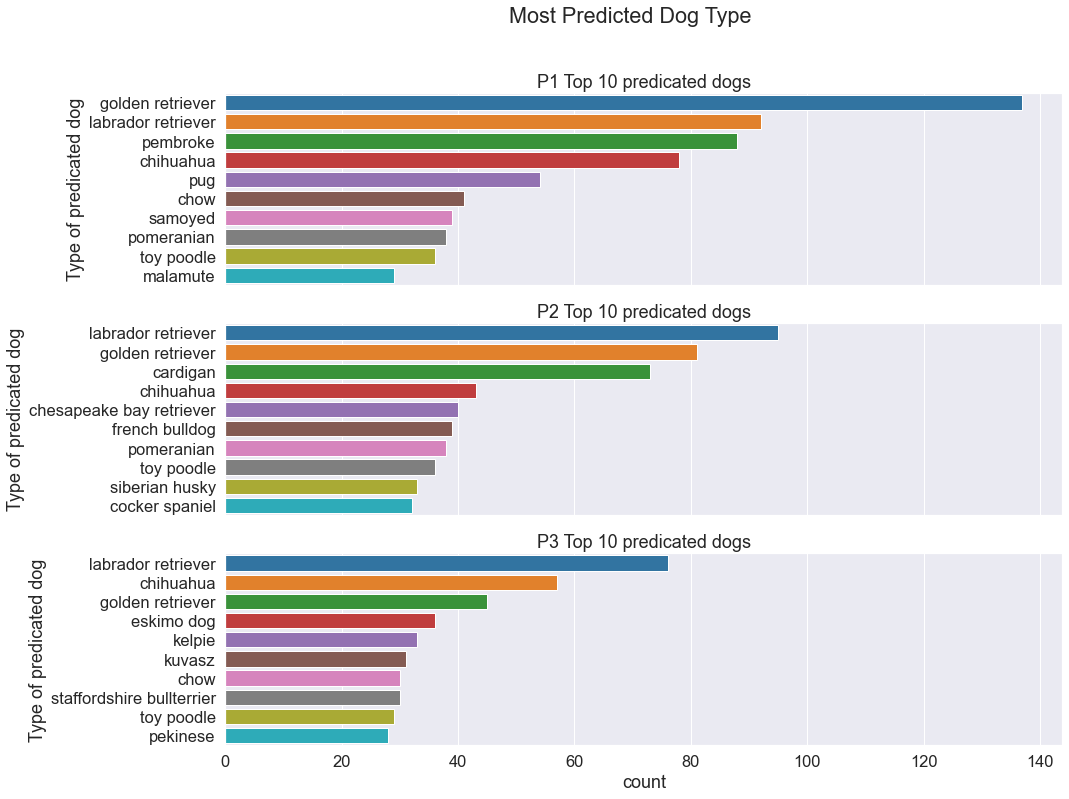

In [186]:
sns.set(font_scale=1.5)
fig, axes = plt.subplots(3,1 , figsize=(15, 12) ,sharex=True)

fig.suptitle('Most Predicted Dog Type')


sns.countplot(ax=axes[0],y="p1",  data=Im_predict_clean, palette="tab10",
              order=Im_predict_clean.p1.value_counts().iloc[:10].index)
axes[0].set(xlabel= '', ylabel='Type of predicated dog', title='P1 Top 10 predicated dogs')


sns.countplot(ax=axes[1],y="p2",  data=Im_predict_clean, palette="tab10",
              order=Im_predict_clean.p2.value_counts().iloc[:10].index)

axes[1].set( xlabel= '',ylabel='Type of predicated dog', title='P2 Top 10 predicated dogs')

sns.countplot(ax=axes[2],y="p3",  data=Im_predict_clean, palette="tab10",
              order=Im_predict_clean.p3.value_counts().iloc[:10].index)

axes[2].set( ylabel='Type of predicated dog', title='P3 Top 10 predicated dogs');


plt.savefig('RMost Predicted Dog Type.png')

### Golden Retriever is the most predicted dog 

# Insight 3: Retweets & Favourite over time

In [180]:
mean_tweets = twitter_archive_master_df.groupby(by=twitter_archive_master_df['timestamp'].dt.date).agg({'tweet_id':'count', 
                                                    'favorite_count': 'mean',                                                    
                                                    'retweet_count': 'mean',
                                                    'followers_count' : 'mean'}, on='y', as_index=False).reset_index()


sum_tweets = twitter_archive_master_df.groupby(by=twitter_archive_master_df['timestamp'].dt.date).agg({'tweet_id':'count', 
                                                    'favorite_count': 'sum',                                                    
                                                    'retweet_count': 'sum',
                                                    'followers_count' : 'mean'}, on='y', as_index=False).reset_index()

sum_tweets['year'] = pd.DatetimeIndex(sum_tweets['timestamp']).year
sum_tweets['month'] = pd.DatetimeIndex(sum_tweets['timestamp']).month

mean_tweets['year'] = pd.DatetimeIndex(sum_tweets['timestamp']).year
mean_tweets['month'] = pd.DatetimeIndex(sum_tweets['timestamp']).month

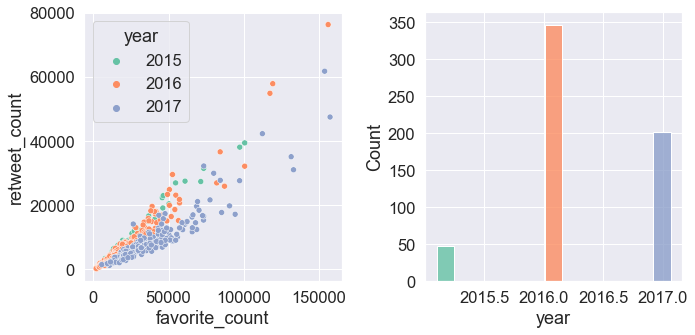

In [203]:
f, axs = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw=dict(width_ratios=[8, 8]))
sns.scatterplot(data=sum_tweets, x="favorite_count", y="retweet_count", hue="year", ax=axs[0],palette="Set2")
sns.histplot(data=sum_tweets, x="year", hue="year", shrink=.8, alpha=.8, legend=False, ax=axs[1],palette="Set2")
f.tight_layout()
plt.savefig('Retweets & Favourite over time.png')

### There is a proportional relationship between retweets counts and favourite counts

# Insight 4: Dog_stage vs tweets (count - retweets - favorite)

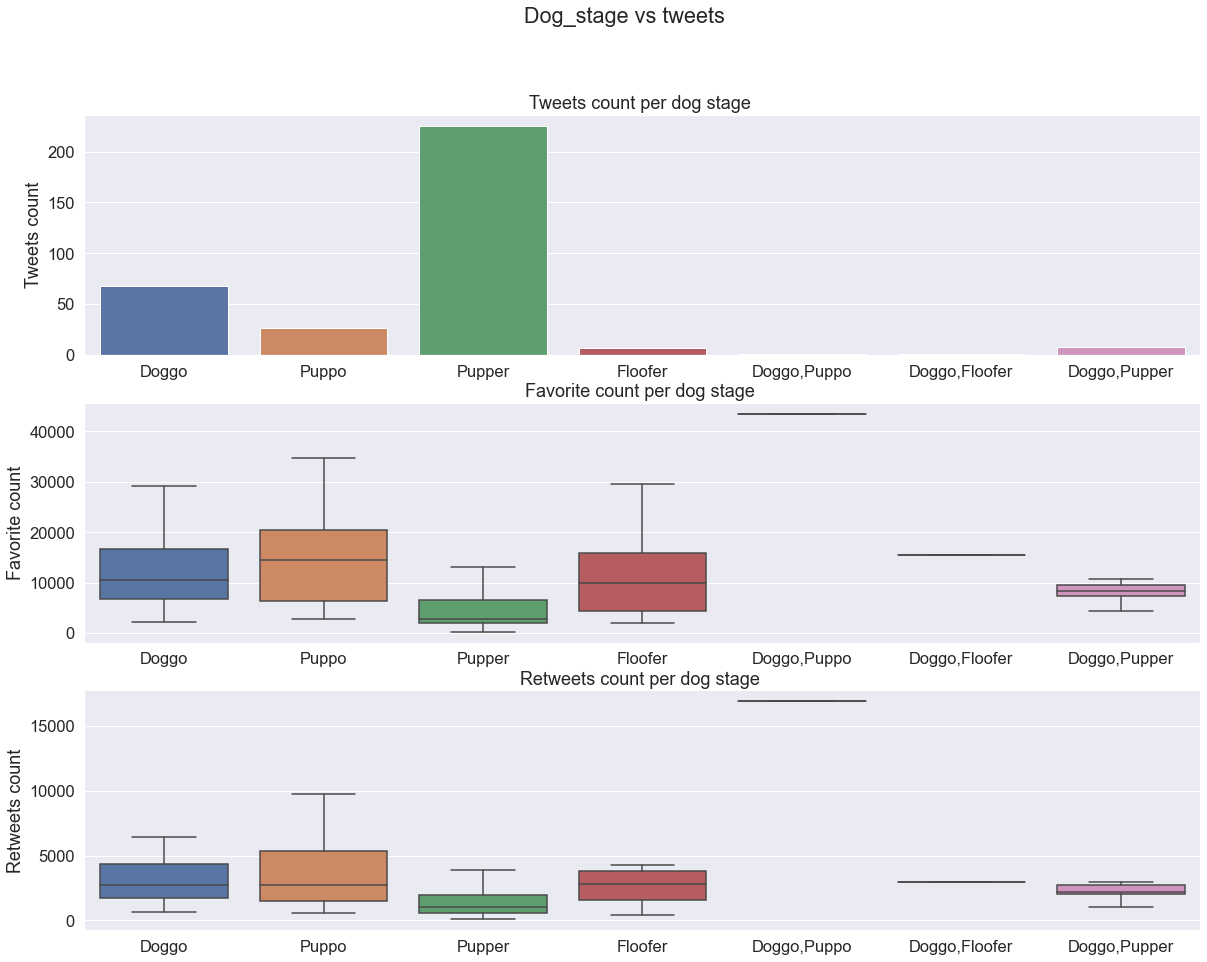

In [249]:
fig, axes = plt.subplots(3, 1, figsize=(20, 15))

fig.suptitle('Dog_stage vs tweets')



sns.countplot(ax=axes[0], x="dog_stage", data=twitter_archive_master_df[-(twitter_archive_master_df.dog_stage == '')]);
axes[0].set(xlabel= '', ylabel='Tweets count', title='Tweets count per dog stage ')


sns.boxplot(ax=axes[1], data=twitter_archive_master_df[-(twitter_archive_master_df.dog_stage == '')], x='dog_stage', y='favorite_count', showfliers = False)
axes[1].set(xlabel= '', ylabel='Favorite count', title='Favorite count per dog stage ')

sns.boxplot(ax=axes[2], data=twitter_archive_master_df[-(twitter_archive_master_df.dog_stage == '')], x='dog_stage', y='retweet_count', showfliers = False)
axes[2].set(xlabel= '', ylabel='Retweets count', title='Retweets count per dog stage ')
plt.savefig('Dog_stage vs tweets.png');

#### For this insight I choose only tweets that have dog stage and I removed the outliers for the retweets and favorite columns

#### Even Pupper stage dogs are the most dominant in the count, but Puppo stage dogs genereated the most interaction.

# Insight 5: Tweets interaction over time


#### Grouping data frame on timestamp column on daily baises and aggregating tweet_id column on count , favorite_count on (sum and mean), retweet_count on (sum and mean) and followers_count mean

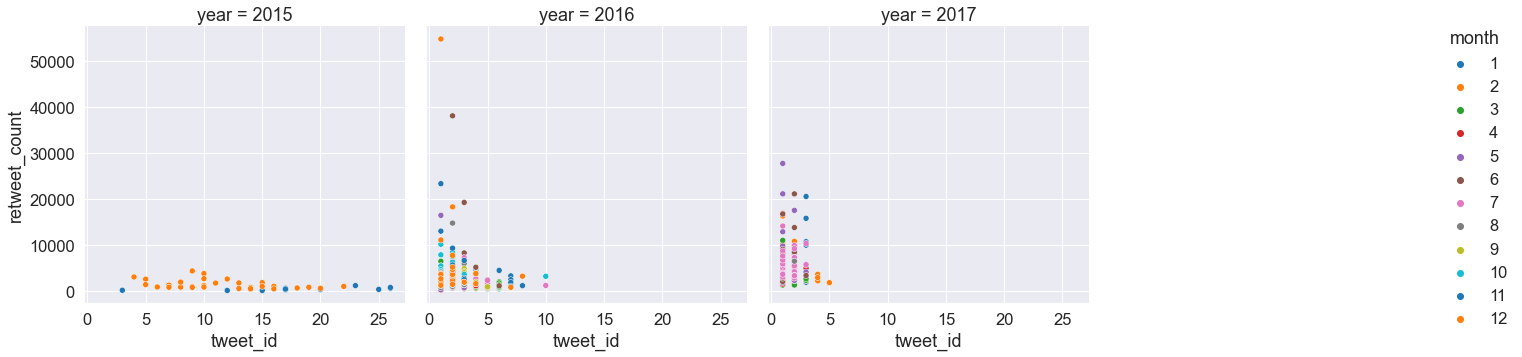

In [250]:
sns.relplot(data=mean_tweets, x="tweet_id", y="retweet_count", hue="month", col="year",palette="tab10", col_wrap=4)
plt.savefig('Retweets count vs tweets.png');

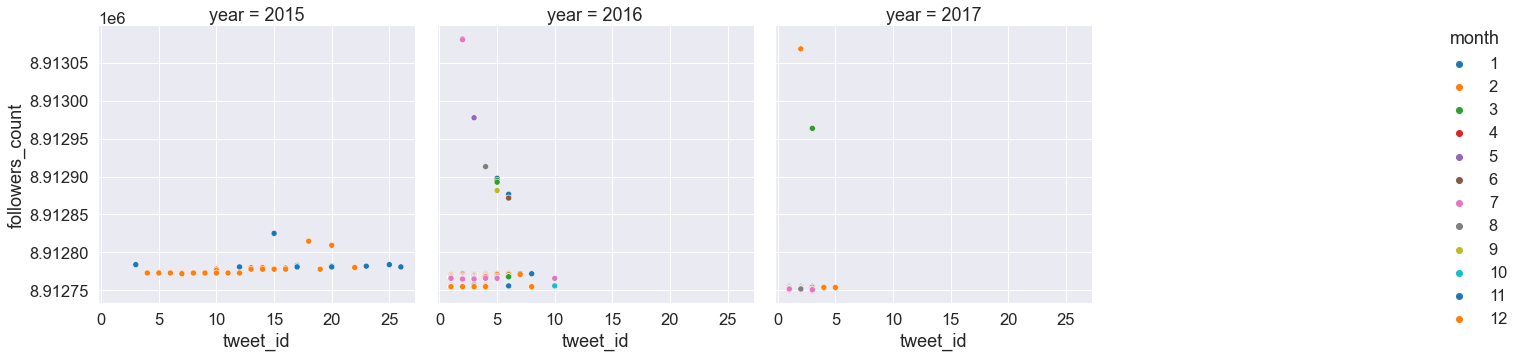

In [251]:
sns.relplot(data=sum_tweets, x="tweet_id", y="followers_count", hue="month", col="year",palette="tab10", col_wrap=4)
plt.savefig('Follwers count vs tweets.png');

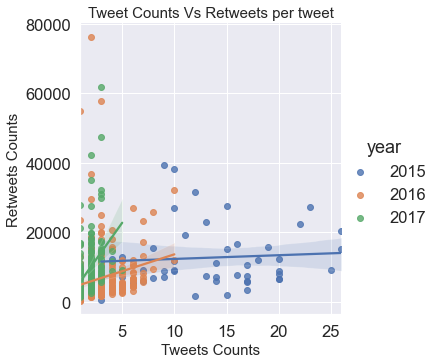

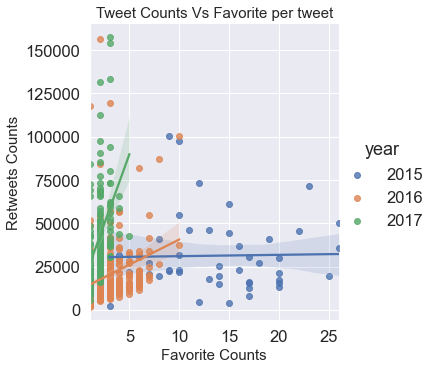

In [252]:
sns.set(font_scale=1.5)
sns.lmplot(y='retweet_count', x='tweet_id', data=sum_tweets,
           fit_reg=True,hue='year',height=5)
plt.xlabel('Tweets Counts', fontsize = 15)
plt.ylabel('Retweets Counts', fontsize = 15)
plt.title('Tweet Counts Vs Retweets per tweet', fontsize = 15)

sns.lmplot(y='favorite_count', x='tweet_id', data=sum_tweets,
           fit_reg=True,hue='year',height=5)
plt.xlabel('Favorite Counts', fontsize = 15)
plt.ylabel('Retweets Counts', fontsize = 15)
plt.title('Tweet Counts Vs Favorite per tweet', fontsize = 15)
plt.savefig('Tweet Counts Vs Favorite per tweet');


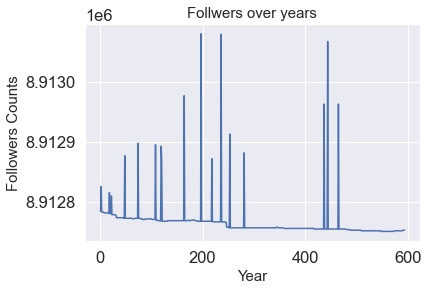

In [213]:
sum_tweets.followers_count.plot()
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Followers Counts', fontsize = 15)
plt.title('Follwers over years', fontsize = 15)
fig.savefig('Follwers over years');


#### The extracted data starting from November-2015 to July-2017. The more interacion from Twitter users with this account depend on quality of tweets not the number of tweets. Followers number didn'd change so much over this period. While 2016 has the biggest total retweets and favorites but 2017 was higer in mean.

# Insight 6: Source vs tweets (count - retweets - favorite)

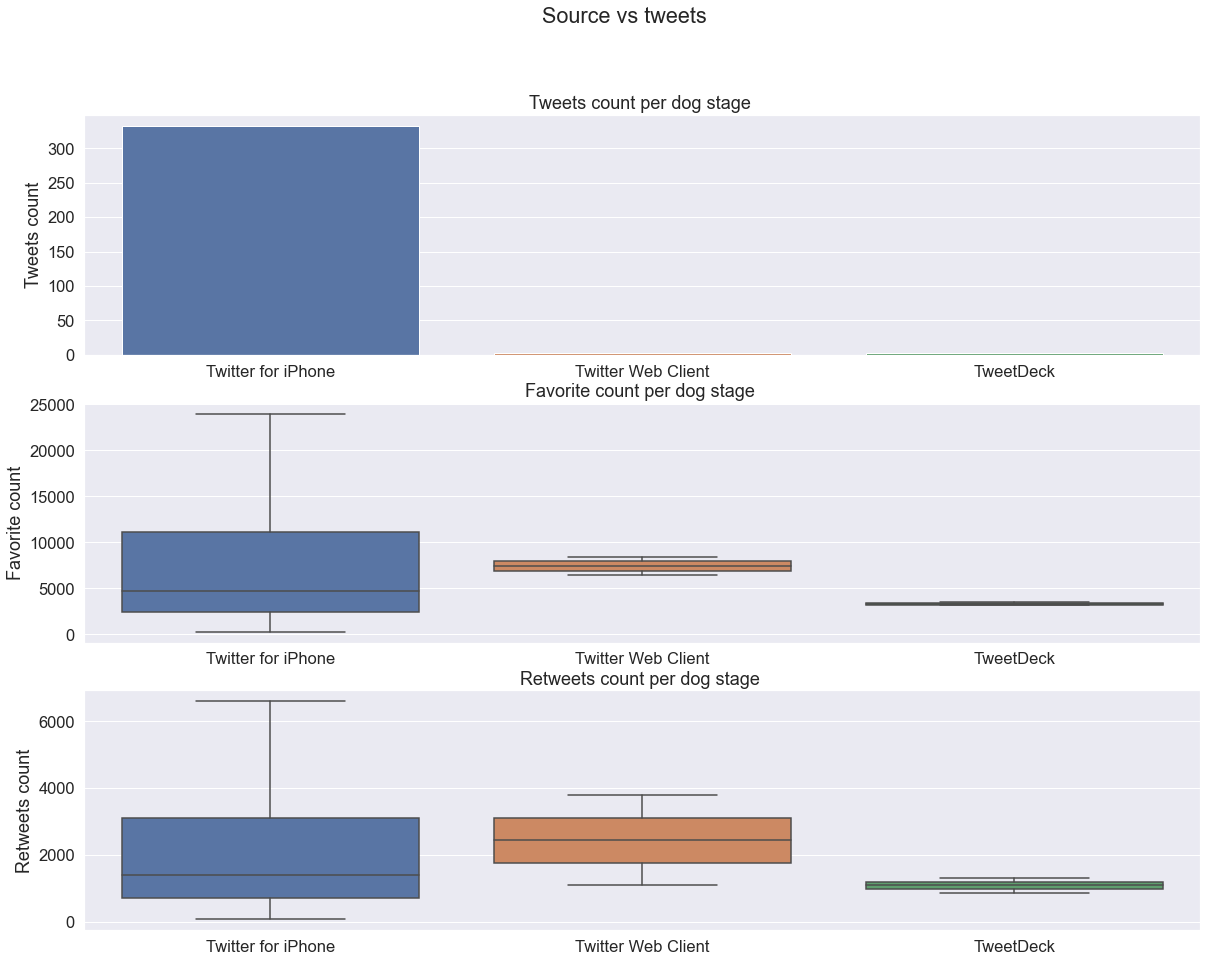

In [216]:
fig, axes = plt.subplots(3, 1, figsize=(20, 15))

fig.suptitle('Source vs tweets')



sns.countplot(ax=axes[0], x="source", data=twitter_archive_master_df[-(twitter_archive_master_df.dog_stage == '')]);
axes[0].set(xlabel= '', ylabel='Tweets count', title='Tweets count per dog stage ')


sns.boxplot(ax=axes[1], data=twitter_archive_master_df[-(twitter_archive_master_df.dog_stage == '')], x='source', y='favorite_count', showfliers = False)
axes[1].set(xlabel= '', ylabel='Favorite count', title='Favorite count per dog stage ')

sns.boxplot(ax=axes[2], data=twitter_archive_master_df[-(twitter_archive_master_df.dog_stage == '')], x='source', y='retweet_count', showfliers = False)
axes[2].set(xlabel= '', ylabel='Retweets count', title='Retweets count per dog stage ')

fig.savefig('Source vs tweets');

#### iPhone is the most important plafrom for future updates